In [1]:
import numpy as np
from numpy.random import RandomState
from scipy.stats import kstest
from matplotlib.pyplot import plot, hist

In [2]:
from longstaff_schwartz.stochastic_process import BrownianMotion

In [3]:
t = np.linspace(0, 10, 20)
t

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [4]:
rnd = RandomState(seed=1234)

In [5]:
bm = BrownianMotion(mu=0.5, sigma=np.sqrt(3))
B = bm.simulate(t, 200, rnd)
B.shape

(20, 200)

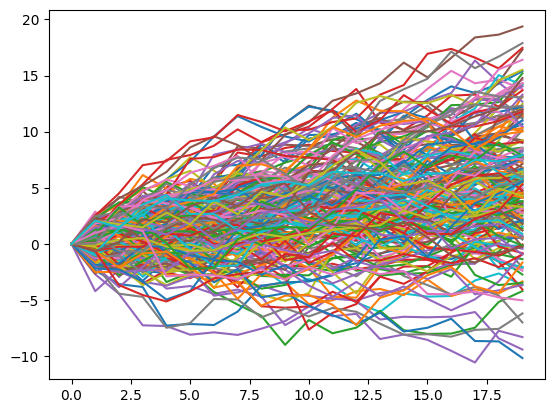

In [6]:
plot(B);

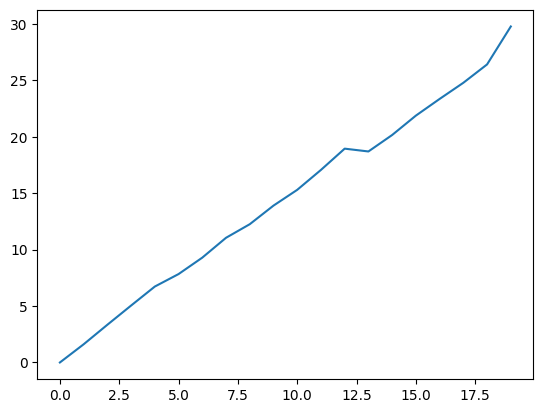

In [7]:
plot(np.var(B, axis=1));

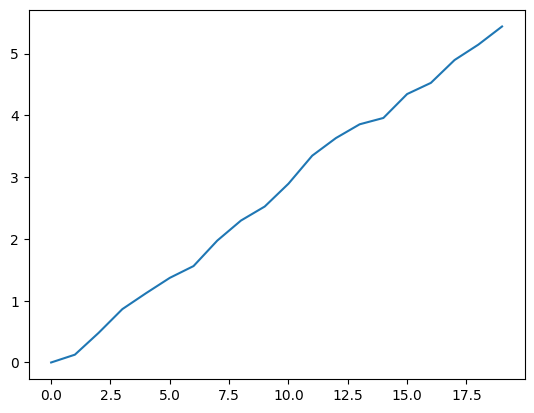

In [8]:
plot(np.mean(B, axis=1));

In [9]:
bm.distribution(t[-1]).args

(5.0, 5.477225575051661)

In [10]:
x = np.linspace(-10, 20)

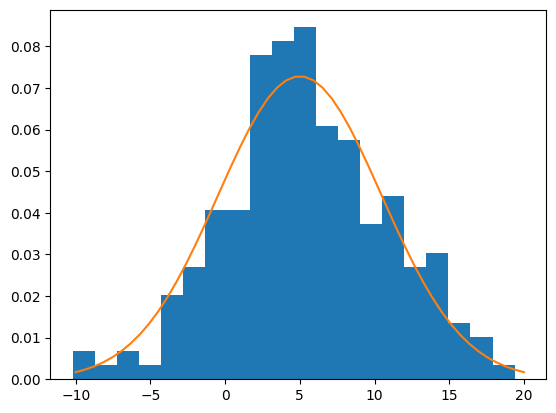

In [11]:
hist(B[-1, :], bins=20, density=True)
plot(x, bm.distribution(t[-1]).pdf(x));

In [12]:
kstest(B[-1, :], bm.distribution(t[-1]).cdf)

KstestResult(statistic=0.057133884901066884, pvalue=0.5127834169305971)

# Check test_brownian_motion_distribution

In [13]:
bm = BrownianMotion(mu=0.123, sigma=0.456)
rnd = RandomState(1234)
t = np.linspace(0, 20, 20)
n = 200
x = bm.simulate(t, n, rnd)
terminal_dist = bm.distribution(t[-1])

In [14]:
assert (t.size, n) == x.shape
assert n == x[-1, :].size

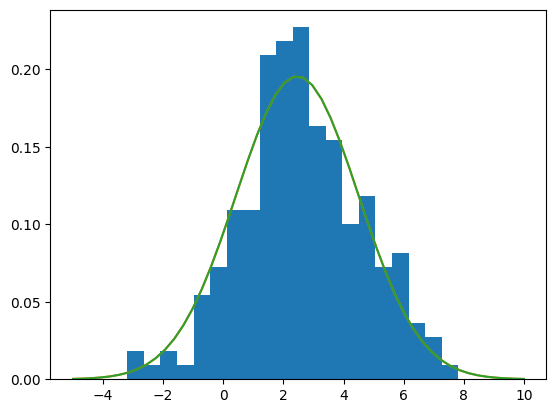

In [15]:
hist(x[-1, :], bins=20, density=True)
y = np.linspace(-5, 10)
plot(y, bm.distribution(t[-1]).pdf(y))
plot(y, terminal_dist.pdf(y));

In [16]:
test_result = kstest(x[-1, :], terminal_dist.cdf)
print(test_result)
assert test_result.pvalue > 0.5

KstestResult(statistic=0.05713388490106705, pvalue=0.5127834169305934)
